# Visualizing Yellow Taxi Trips Pickups

January 2016 Yellow Taxi Pickups

In [80]:
url = "https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv"

In [81]:
df = pd.read_csv(url)

In [89]:
df.shape

(10906858, 19)

In [90]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [91]:
def parseTrips(df):
    
    tripTable = pd.DataFrame()
    tripTable['start_time'] = pd.to_datetime(df['tpep_pickup_datetime'])
    tripTable['end_time'] = pd.to_datetime(df['tpep_dropoff_datetime'])
    tripTable['passenger_count'] = df['passenger_count']
    tripTable['start_lat'] = df['pickup_latitude']
    tripTable['start_lon'] = df['pickup_longitude']
    tripTable['end_lat'] = df['dropoff_latitude']
    tripTable['end_lon'] = df['dropoff_longitude']
    tripTable['duration'] = tripTable['end_time'] - tripTable['start_time']
    tripTable['duration'] = tripTable['duration'].dt.total_seconds()
    
    tripTable = tripTable.sort_values(by=['start_time', 'end_time'])
    return tripTable

In [92]:
tripTable = parseTrips(df)

In [93]:
tripTable.head()

,start_time,end_time,passenger_count,start_lat,start_lon,end_lat,end_lon,duration
0,2016-01-01,2016-01-01,2,40.734695,-73.990372,40.732407,-73.981842,0.0
1,2016-01-01,2016-01-01,5,40.729912,-73.980782,40.716679,-73.944473,0.0
2,2016-01-01,2016-01-01,1,40.679565,-73.984550,40.788925,-73.950272,0.0
3,2016-01-01,2016-01-01,1,40.718990,-73.993469,40.657333,-73.962242,0.0
4,2016-01-01,2016-01-01,3,40.781330,-73.960625,40.758514,-73.977264,0.0


In [94]:
tripTable.tail()

,start_time,end_time,passenger_count,start_lat,start_lon,end_lat,end_lon,duration
8042549,2016-01-31 23:59:58,2016-02-01 00:07:36,1,40.754173,-73.984741,40.780537,-73.983727,458.0
8042551,2016-01-31 23:59:59,2016-02-01 00:07:26,2,40.734329,-74.002945,40.739185,-73.996948,447.0
8042552,2016-01-31 23:59:59,2016-02-01 00:09:28,1,40.728230,-73.999115,40.738449,-73.997169,569.0
8042553,2016-01-31 23:59:59,2016-02-01 00:12:16,1,40.720074,-73.988335,40.743851,-74.006645,737.0
8042058,2016-01-31 23:59:59,2016-02-01 00:13:01,1,40.722889,-73.988907,40.689171,-73.960037,782.0


In [95]:
tripTable.to_csv("yellow_2016_01.csv")

# Visualizing with Datashader

In [96]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [97]:
import pandas as pd
import datashader as ds
import datashader.transfer_functions as tf
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno

In [98]:
def clipDataToBoundingBox(df, bbox):
    min_lon, min_lat, max_lon, max_lat = bbox
    clipped = df[((df['start_lat'] >= min_lat) & (df['start_lat'] <= max_lat) &\
                  (df['start_lon'] >= min_lon) & (df['start_lon'] <= max_lon) &\
                  (df['end_lat'] >= min_lat)   & (df['end_lat']   <= max_lat) &\
                  (df['end_lon'] >= min_lon)   & (df['end_lon']   <= max_lon))]
    return clipped

In [99]:
nyc_bbox = [-74.278564,40.485604,-73.609772,40.945676]
tripTable_clipped = clipDataToBoundingBox(tripTable, nyc_bbox)

In [100]:
background = "black"
export = partial(export_image, background = background)
cm = partial(colormap_select, reverse=(background!="black"))

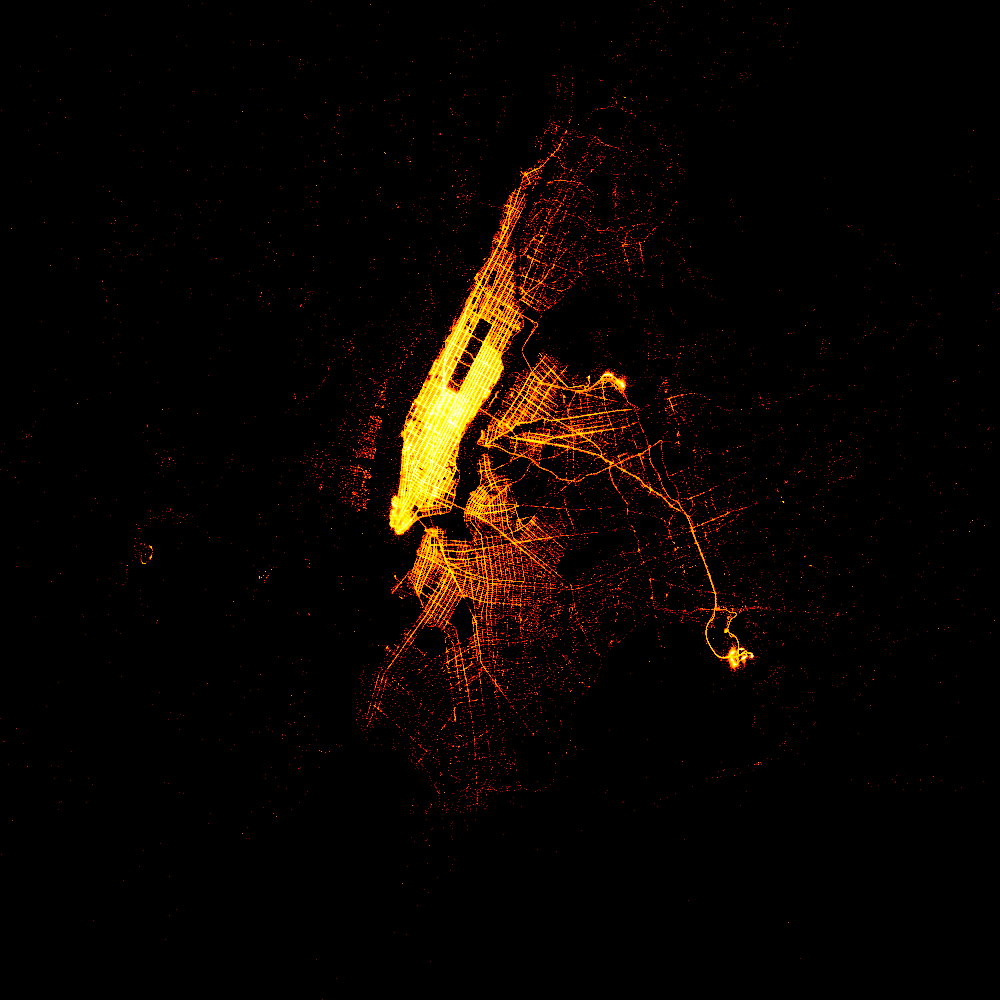

In [101]:
cvs = ds.Canvas(plot_width=1000, plot_height=1000)
agg = cvs.points(tripTable_clipped, 'start_lon', 'start_lat')
export(tf.shade(agg, cmap = cm(Hot,0.2), how='eq_hist'),"passenger_count")